In [161]:
import pandas as pd
import numpy as np
%matplotlib inline

In [162]:
t = pd.read_csv('../KO.csv', index_col=0)

fix_glc = pd.read_csv('../result/fix_glucose.csv', index_col=0)/100
fix_glu = pd.read_csv('../result/fix_glutamate.csv', index_col=0)/100
grad_glc = pd.read_csv('../result/grad_glc.csv', index_col=0)
grad_glu = pd.read_csv('../result/grad_glu.csv', index_col=0)

,Day 0,Day 1,Day 2,Day 3,Day 1.1,Day 2.1,Day 3.1,Day 1.2,Day 2.2,Day 3.2
pH,7.547,7.575,7.558,7.532,7.542,7.512,7.467,7.552,7.546,7.532
Glucose(g/L),3.020,3.160,3.040,2.950,3.120,2.970,2.710,3.070,3.130,3.000
Lactate(g/L),0.000,0.000,0.000,0.000,0.000,0.000,0.310,0.000,0.000,0.000
Glutamine(mmol/L),1.930,1.980,1.800,1.690,1.900,1.570,1.370,1.920,1.730,1.590
Glutamate(mmol/L),0.320,0.000,0.260,0.250,0.220,0.460,0.530,0.000,0.310,0.250
Na(mmol/L),149.000,153.000,157.000,160.000,153.000,157.000,160.000,153.000,156.000,158.000
K(mmol/L),4.200,4.300,4.400,4.500,4.300,4.400,4.500,4.300,4.400,4.400
NH4(mmol/L),0.410,0.510,0.620,0.680,0.540,0.730,0.900,0.510,0.640,0.720


In [37]:
for i in t.columns[1:]:
    t[i] = (t[i]-t['Day 0'])    
t = t.drop('Day 0', axis=1)

In [39]:
g = t[['Day 3', 'Day 3.1', 'Day 3.2']]
g = g.drop(['pH','Glutamine(mmol/L)', 'Na(mmol/L)', 'K(mmol/L)'])
g.T[['Glucose(g/L)', 'Glutamate(mmol/L)']] = (g.T[['Glucose(g/L)', 'Glutamate(mmol/L)']]*(-1))

In [89]:
norm_by_glc = g/g.T['Glucose(g/L)']
norm_by_glu = g/g.T['Glutamate(mmol/L)']

norm_by_glc.columns = ['Con', 'CloneA', 'CloneB']
norm_by_glu.columns = ['Con', 'CloneA', 'CloneB']

norm_by_glu['CloneA'] = norm_by_glu['CloneA']*(-1)

In [90]:
norm_by_glu

,Con,CloneA,CloneB
Glucose(g/L),1.000000,1.476190,0.285714
Lactate(g/L),0.000000,1.476190,0.000000
Glutamate(mmol/L),1.000000,-1.000000,1.000000
NH4(mmol/L),3.857143,2.333333,4.428571


In [138]:
norm_by_glc

,Con,CloneA,CloneB
Glucose(g/L),1.000000,1.000000,1.0
Lactate(g/L),0.000000,1.000000,0.0
Glutamate(mmol/L),1.000000,-0.677419,3.5
NH4(mmol/L),3.857143,1.580645,15.5


In [159]:
sum(np.square(list(fix_glc.T[404])-(norm_by_glc['CloneB'])))

185.93680173799964

In [157]:
fix_glc.T[404]

Glucose_input      1.00000
Lactate_output     0.00000
Glutamate_input    2.27824
Ammonia_output     1.91898
Name: 404, dtype: float64

In [94]:
z = []
for l in norm_by_glc.columns:
    x = fix_glc - list(norm_by_glc[l].T)
    c = []
    for i in x.index:
        c.append(sum(np.square(x.T[i])))
    z.append(c)

In [100]:
fix_glucose = pd.DataFrame(z).T
fix_glucose.columns = ['Con', 'CloneA', 'CloneB']

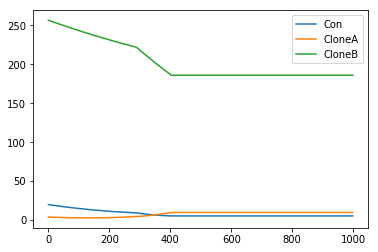

In [102]:
fix_glucose.plot()

In [103]:
z = []
for l in norm_by_glc.columns:
    x = fix_glu - list(norm_by_glu[l].T)
    c = []
    for i in x.index:
        c.append(sum(np.square(x.T[i])))
    z.append(c)

In [104]:
fix_glutamate = pd.DataFrame(z).T
fix_glutamate.columns = ['Con', 'CloneA', 'CloneB']

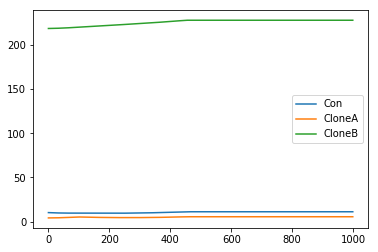

In [105]:
fix_glutamate.plot()

In [106]:
z = []
for l in norm_by_glc.columns:
    x = grad_glu - list(norm_by_glu[l].T)
    c = []
    for i in x.index:
        c.append(sum(np.square(x.T[i])))
    z.append(c)

In [107]:
grad_glutamate = pd.DataFrame(z).T
grad_glutamate.columns = ['Con', 'CloneA', 'CloneB']

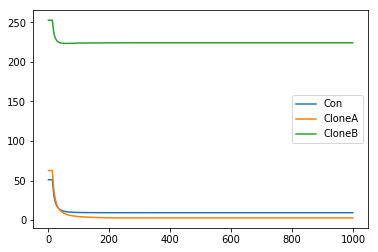

In [108]:
grad_glutamate.plot()

In [109]:
z = []
for l in norm_by_glc.columns:
    x = grad_glc - list(norm_by_glc[l].T)
    c = []
    for i in x.index:
        c.append(sum(np.square(x.T[i])))
    z.append(c)

In [110]:
grad_glucose = pd.DataFrame(z).T
grad_glucose.columns = ['Con', 'CloneA', 'CloneB']

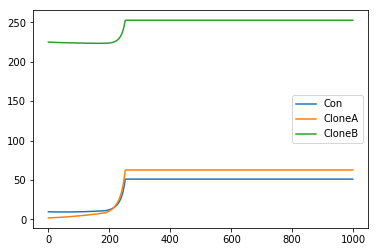

In [111]:
grad_glucose.plot()

In [133]:
t = pd.concat([fix_glucose, fix_glutamate, grad_glucose, grad_glutamate], axis=1)
t = t.fillna(10000)

In [134]:
t.columns = [i+'_fix_glc' for i in fix_glucose.columns]+[i+'_fix_glu' for i in fix_glucose.columns]+[i+'grad_glc' for i in fix_glucose.columns]+[i+'grad_glu' for i in fix_glucose.columns]

In [137]:
for i in t.columns:
    print(i, min(t[i]))

Con_fix_glc 5.390372758408196
CloneA_fix_glc 2.82902275188512
CloneB_fix_glc 185.93680173799964
Con_fix_glu 9.401109596335269
CloneA_fix_glu 4.150884495317377
CloneB_fix_glu 218.4999999999996
Congrad_glc 9.401113755303331
CloneAgrad_glc 1.9006153194319622
CloneBgrad_glc 223.36513160793154
Congrad_glu 9.401109009790275
CloneAgrad_glu 2.791389376464011
CloneBgrad_glu 223.365259826221


In [144]:
list(t['CloneB_fix_glc']).index(min(t['CloneB_fix_glc']))

404

Glucose_input      1.00000
Lactate_output     0.00000
Glutamate_input    2.27824
Ammonia_output     1.91898
Name: 404, dtype: float64